<div style='background-color : lightgreen'>
    <a id='TableOfContents'></a>
    <h1 style='text-align : center; padding-top: 20px; font-family: cursive;'>
        Table of Contents
    </h1>
    <ul style='list-style-type:none; display: flex; justify-content: center; margin-bottom: 30px;padding-left: 100px;'>
        <li style='margin-right: 20px;'><a href='#imports'>Imports</a></li>
        <li style='margin-right: 20px;'><a href='#q1'>Question 1</a></li>
        <li style='margin-right: 20px;'><a href='#q2'>Question 2</a></li>
        <li style='margin-right: 20px;'><a href='#q3'>Question 3</a></li>
        <li style='margin-right: 20px;'><a href='#q4'>Question 4</a></li>
        <li style='margin-right: 20px;'><a href='#q5'>Question 5</a></li>
        <li style='margin-right: 20px;'><a href='#q6'>Question 6</a></li>
        <li style='margin-right: 20px;'><a href='#q7'>Question 7</a></li>
        <li style='margin-right: 20px;'><a href='#q8'>Question 8</a></li>
        <li><a href='#bonus'>Bonus</a></li>
    </ul>
</div>


<div style='background-color : lightblue'>
<a id='imports'></a>
    <b><u><i><h1 style='text-align : center;padding-top: 25px;''>
        Imports
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [2]:
import pandas as pd
import numpy as np

import matplotlib
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('prepped_data.csv')

In [3]:
df

,date,day_of_week,start_time,week_num,home_score,home_wins,away_score,away_wins,stadium,temp,...,wind,spread,ou,is_under,abnormal_start,total_scores,is_playoff,playoff_implications,is_turf,is_outdoor
0,2023-02-12,Sunday,6,19,35,16,38,16,State Farm Stadium,72,...,0,1.0,51.0,0,0,73,1,1,0,0
1,2023-01-29,Sunday,3,19,31,15,7,15,Lincoln Financial Field,52,...,14,2.5,45.5,1,0,38,1,1,0,1
2,2023-01-29,Sunday,6,19,23,15,20,14,GEHA Field at Arrowhead Stadium,22,...,13,1.5,48.0,1,0,43,1,1,0,1
3,2023-01-22,Sunday,3,19,10,14,27,13,Highmark Stadium,32,...,0,5.5,49.0,1,0,37,1,1,1,1
4,2023-01-22,Sunday,6,19,19,14,12,13,Levi's Stadium,55,...,19,4.0,47.0,1,0,31,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10806,1979-09-02,Sunday,4,1,14,0,0,0,Arrowhead Stadium,76,...,8,1.0,37.0,1,0,14,0,0,1,1
10807,1979-09-02,Sunday,4,1,22,0,25,0,Shea Stadium,73,...,10,2.0,41.0,0,0,47,0,0,0,1
10808,1979-09-02,Sunday,4,1,17,0,24,0,Los Angeles Memorial Coliseum,70,...,10,4.0,36.5,0,0,41,0,0,0,1
10809,1979-09-02,Sunday,4,1,16,0,33,0,Seattle Kingdome,72,...,0,2.0,42.5,0,0,49,0,0,1,0


In [4]:
def train_validate_test(df,target):
    """
    Splits data into 3 segments and stratifies on target
    requires the dataframe and target as args
    """
    train_val, test = train_test_split(df,
                                       train_size=0.82,
                                       random_state=706,
                                       stratify=df[target])
    train, validate = train_test_split(train_val,
                                       train_size=0.73,
                                       random_state=706,
                                       stratify=train_val[target])
    return train, validate, test

In [5]:
train, val, test = train_validate_test(df, 'is_under')

<div style='background-color : lightblue'>
<a id='q1'></a>
    <b><u><i><h1 style='text-align : center; padding-top: 25px;''>
        Explore
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [6]:
train.shape, val.shape, test.shape

((6471, 21), (2394, 21), (1946, 21))

<b>prep 1.</b> 
set date to pd date time

<div style='background-color : lightblue'>
<a id='q2'></a>
    <b><u><i><h1 style='text-align : center; padding-top: 25px;''>
        over/under distribution
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

<b>Question 2.</b> 

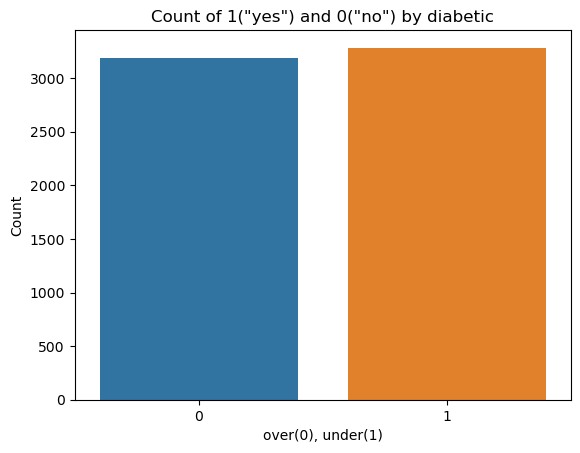

In [7]:
# create a bar plot
sns.countplot(x='is_under', data=train)

# add axis labels and title
plt.xlabel('over(0), under(1)')
plt.ylabel('Count')
plt.title('Count of 1("yes") and 0("no") by diabetic')

# show the plot
plt.show()

In [8]:
train.is_under.value_counts(normalize=True)

1    0.50734
0    0.49266
Name: is_under, dtype: float64

<div style='background-color : lightblue'>
<a id='q3'></a>
    <b><u><i><h1 style='text-align : center;padding-top: 25px;''>
        Question 3
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

<b>Question 3.</b> 

In [9]:
train.columns

Index(['date', 'day_of_week', 'start_time', 'week_num', 'home_score',
       'home_wins', 'away_score', 'away_wins', 'stadium', 'temp', 'humidity',
       'wind', 'spread', 'ou', 'is_under', 'abnormal_start', 'total_scores',
       'is_playoff', 'playoff_implications', 'is_turf', 'is_outdoor'],
      dtype='object')

IndexError: index 20 is out of bounds for axis 0 with size 20

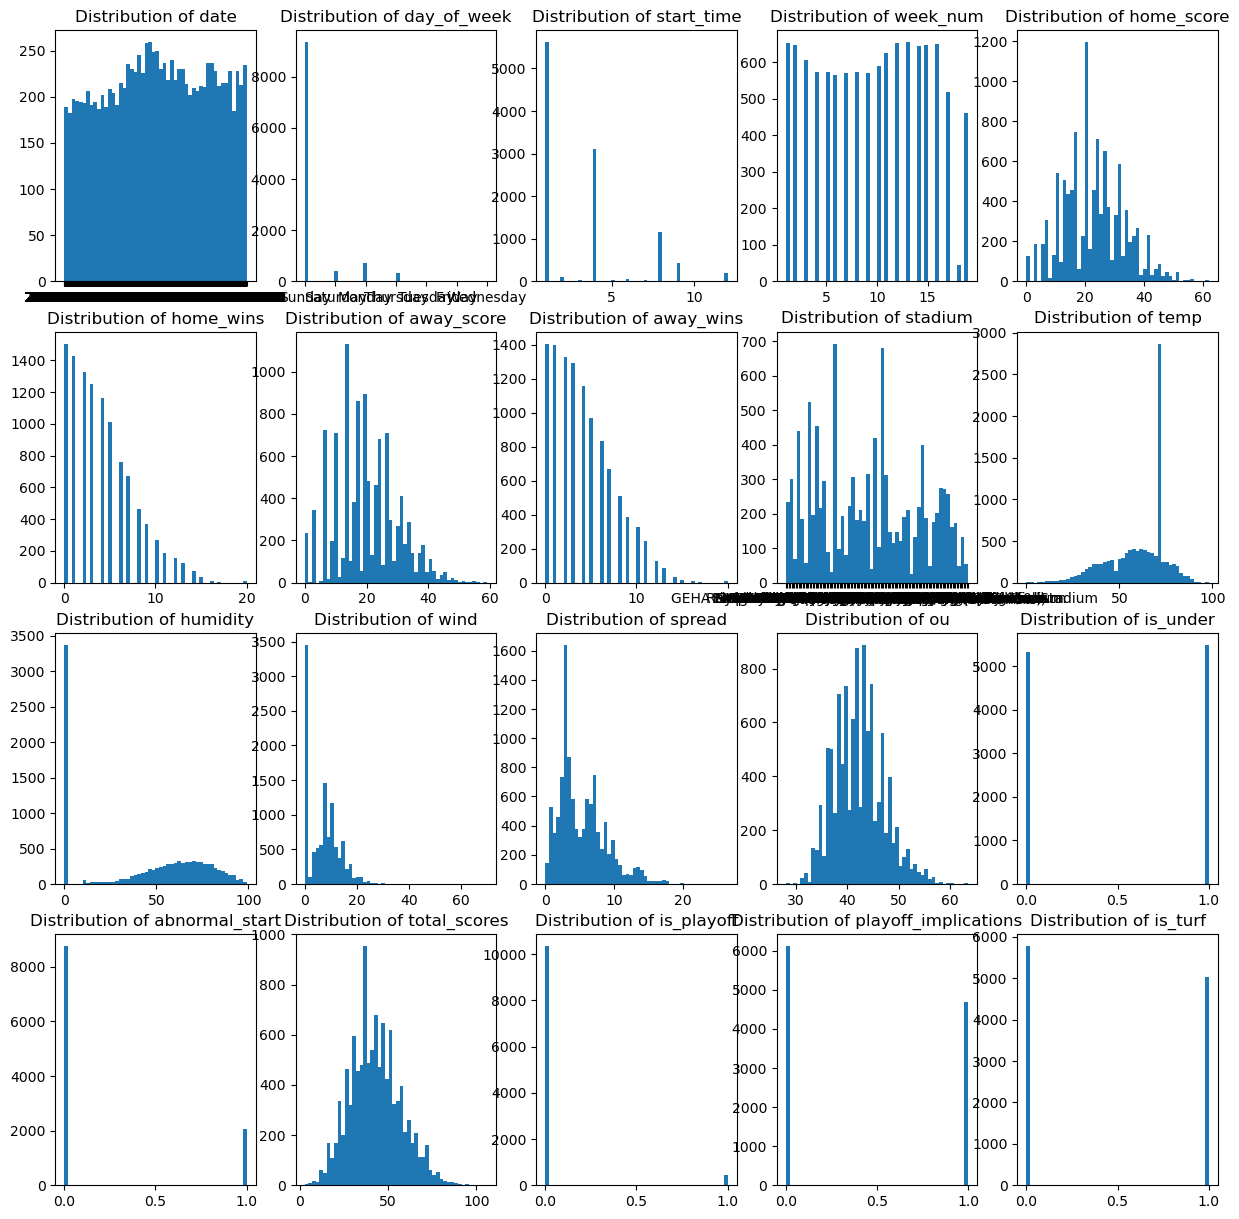

In [10]:
import matplotlib.pyplot as plt

# Create the subplots
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 15))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate over each column and plot a histogram on its corresponding subplot
for i, col in enumerate(df.columns):
    axes[i].hist(df[col], bins=50)
    axes[i].set_title(f'Distribution of {col}')

# Remove any unused subplots
for i in range(len(df.columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust the spacing between subplots and display the plots
plt.tight_layout()
plt.show()


<div style='background-color : lightblue'>
    <a id='q4'></a>
    <b><u><i><h1 style='text-align : center; padding-top: 25px;'>
        Question 4
    </h1></i></u></b>
    <li><a href='#TableOfContents'>Table of Contents</a></li>
</div>


<b>Question 4.</b> 

In [12]:
# # Set the number of rows and columns for subplots
# nrows = 4
# ncols = 5

# # Create the subplots
# fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))

# # Flatten the axes array for easier indexing
# axes = axes.flatten()

# # Iterate over each column (except 'is_under') and plot a comparison with 'is_under'
# for i, col in enumerate(df.columns):
#     if col != 'is_under':
#         axes[i].scatter(df[col], df['is_under'])
#         axes[i].set_title(f'{col} vs is_under')

# # Remove any unused subplots
# for i in range(len(df.columns) - 1, len(axes)):
#     fig.delaxes(axes[i])

# # Adjust the spacing between subplots and display the plots
# plt.tight_layout()
# plt.show()


<div style='background-color : lightblue'>
<a id='q5'></a>
    <b><u><i><h1 style='text-align : center; padding-top: 25px;''>
        Question 5
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

<b>Question 5.</b> 

In [ ]:
df.columns

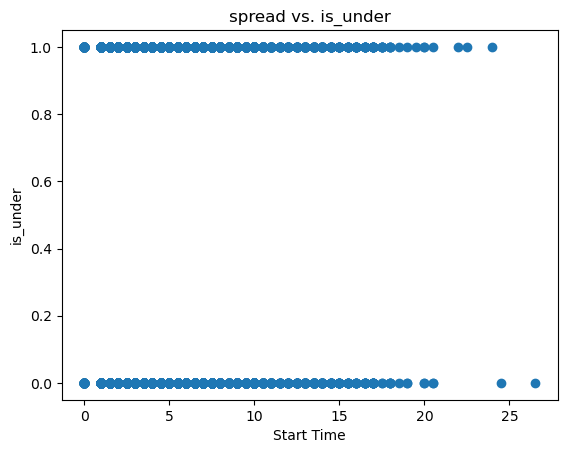

In [13]:
plt.scatter(df['spread'], df['is_under'])
plt.xlabel('Start Time')
plt.ylabel('is_under')
plt.title('spread vs. is_under')
plt.show()

<div style='background-color : lightblue'>
<a id='q6'></a>
    <b><u><i><h1 style='text-align : center; padding-top: 25px;''>
        Question 6
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

<b>Question 6.</b> 

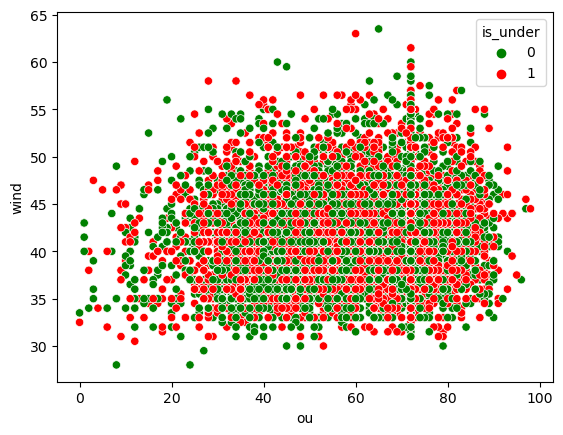

In [14]:

sns.scatterplot(data=df, x='temp', y='ou' ,hue='is_under', palette=['green', 'red'])

plt.xlabel('ou')
plt.ylabel('wind')
# plt.title('Count of Over/Under for Each Week')

plt.show()


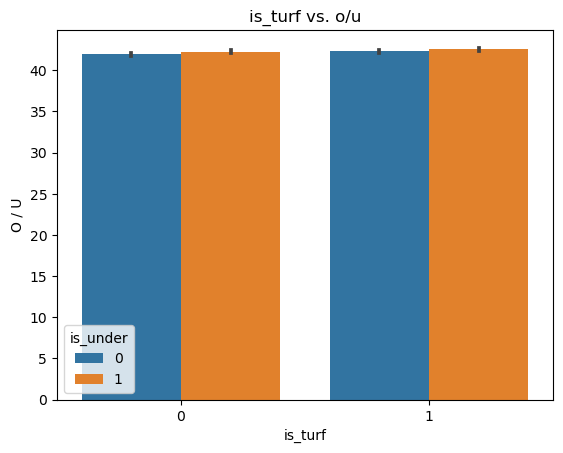

In [15]:
sns.barplot(df['is_turf'], df['ou'], hue=df['is_under'])
plt.xlabel('is_turf')
plt.ylabel('O / U')
plt.title('is_turf vs. o/u')
plt.show()

In [16]:
df.columns

Index(['date', 'day_of_week', 'start_time', 'week_num', 'home_score',
       'home_wins', 'away_score', 'away_wins', 'stadium', 'temp', 'humidity',
       'wind', 'spread', 'ou', 'is_under', 'abnormal_start', 'total_scores',
       'is_playoff', 'playoff_implications', 'is_turf', 'is_outdoor'],
      dtype='object')

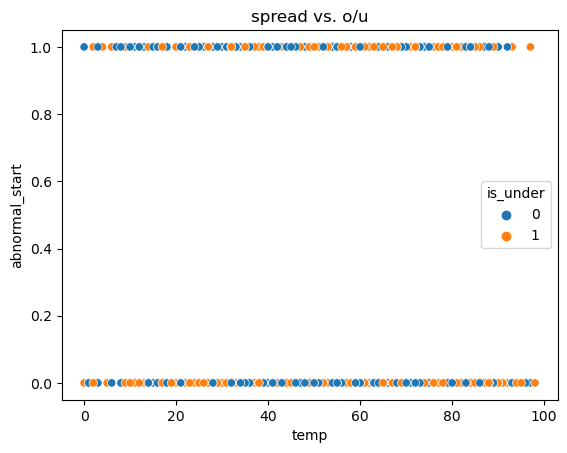

In [17]:
sns.scatterplot(df['temp'], df['abnormal_start'], hue=df['is_under'])
plt.xlabel('temp')
plt.ylabel('abnormal_start')
plt.title('spread vs. o/u')
plt.show()

<div style='background-color : lightblue'>
<a id='q7'></a>
    <b><u><i><h1 style='text-align : center; padding-top: 25px;''>
        Question 7
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

<b>Question 7.</b> 

In [20]:
df.stadium.value_counts()

Giants Stadium         451
Soldier Field          351
Arrowhead Stadium      336
Lambeau Field          315
Louisiana Superdome    247
                      ... 
Tiger Stadium (LSU)      4
Alamo Dome               3
Twickenham Stadium       3
Stanford Stadium         2
Allianz Arena            1
Name: stadium, Length: 130, dtype: int64

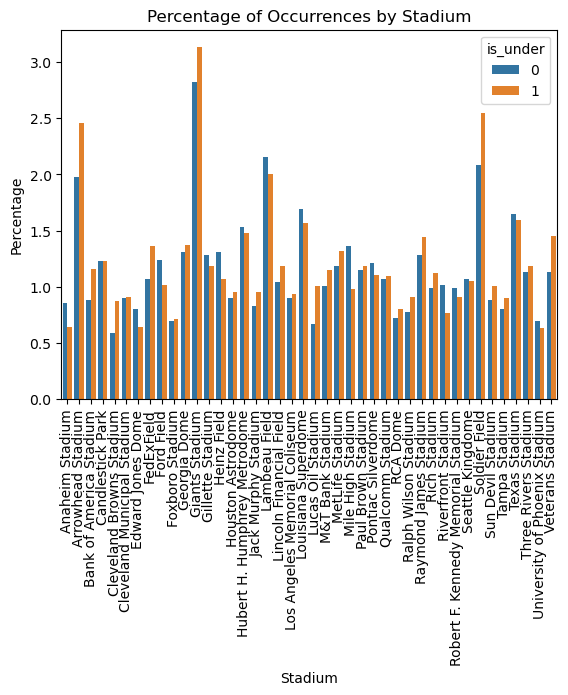

In [29]:
# Filter the stadiums with a value count over 50
filtered_stadiums = df['stadium'].value_counts().loc[lambda x: x > 100].index

# Filter the DataFrame based on the filtered stadiums
filtered_df = df[df['stadium'].isin(filtered_stadiums)]

# Group the DataFrame by 'stadium' and 'is_under' and calculate the percentage
percentage_df = filtered_df.groupby(['stadium', 'is_under']).size() / len(filtered_df) * 100
percentage_df = percentage_df.reset_index(name='Percentage')

# Create the bar plot
sns.barplot(data=percentage_df, x='stadium', y='Percentage', hue='is_under')
plt.xlabel('Stadium')
plt.ylabel('Percentage')
plt.title('Percentage of Occurrences by Stadium')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.legend(title='is_under')
plt.show()









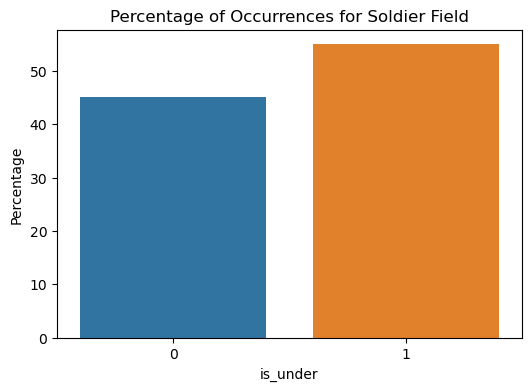

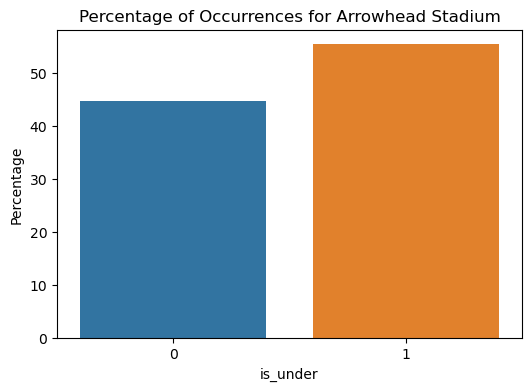

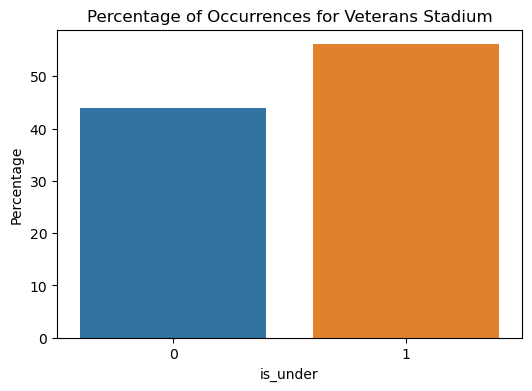

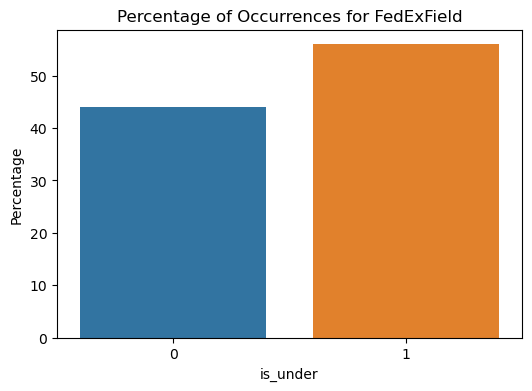

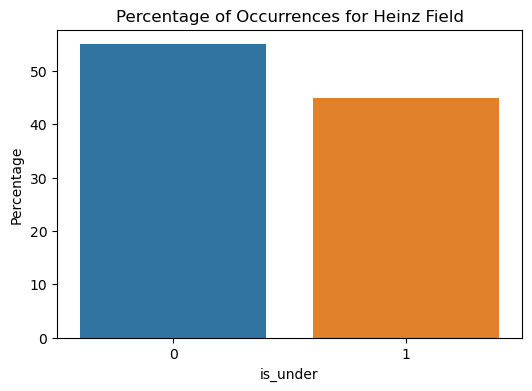

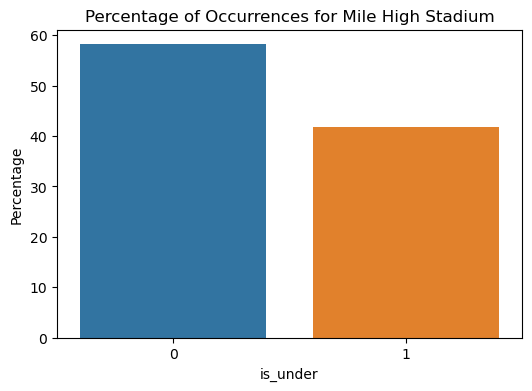

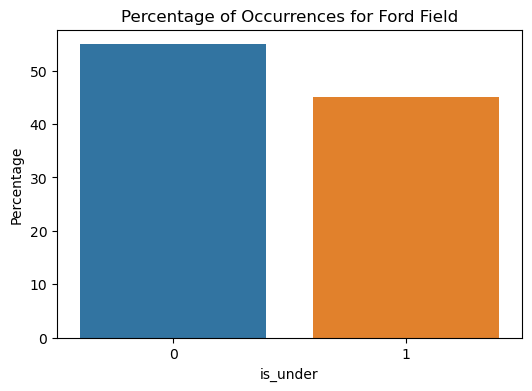

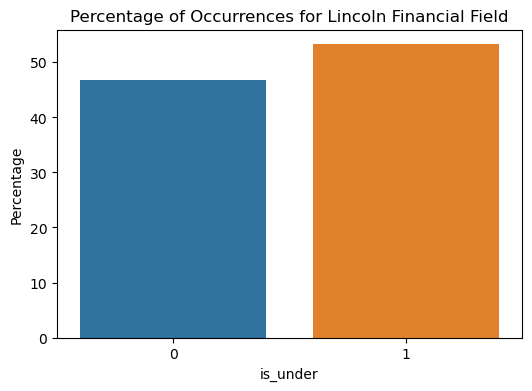

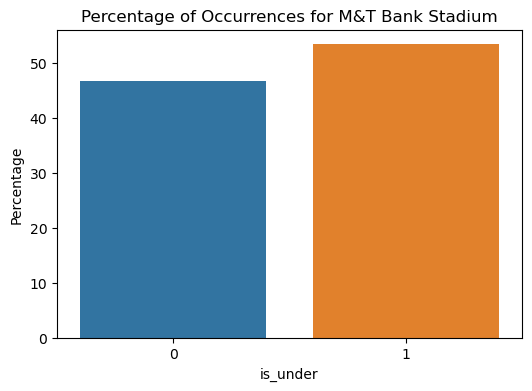

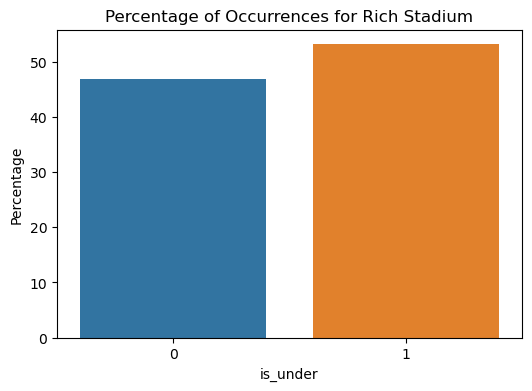

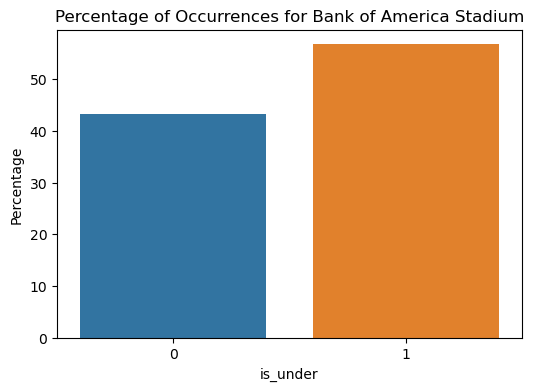

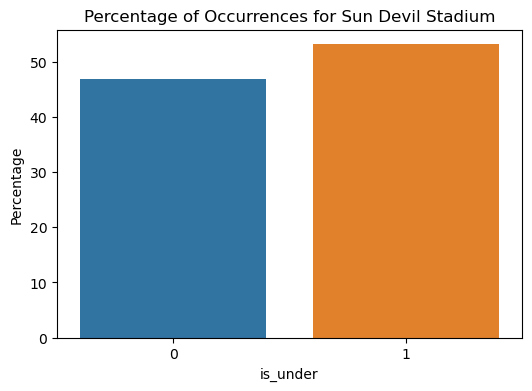

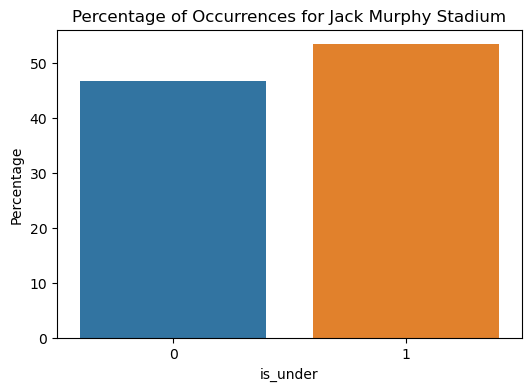

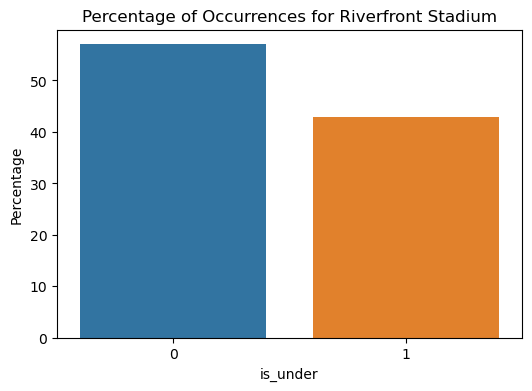

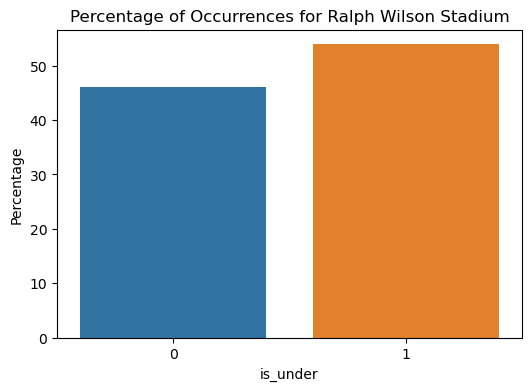

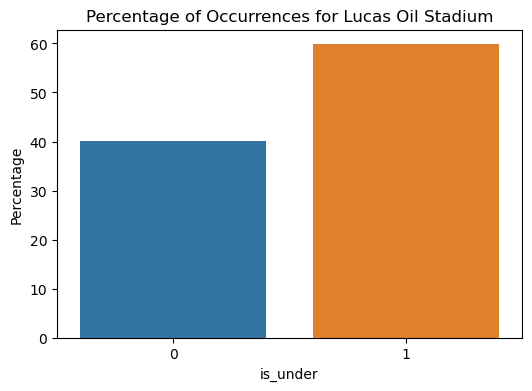

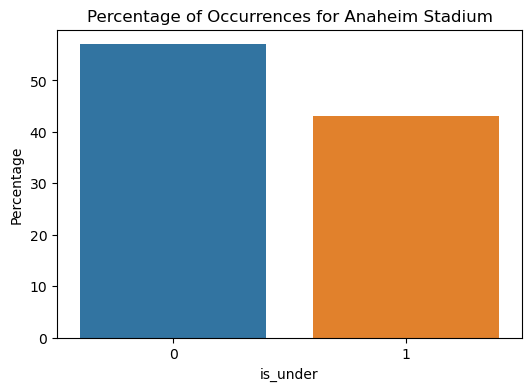

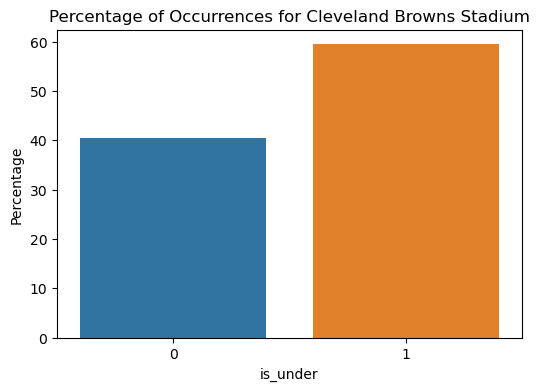

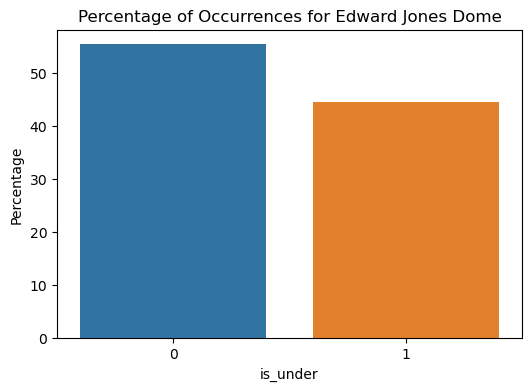

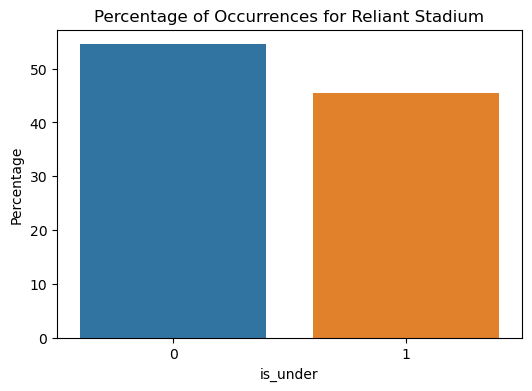

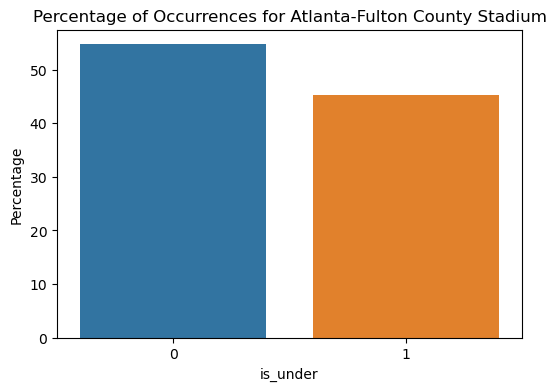

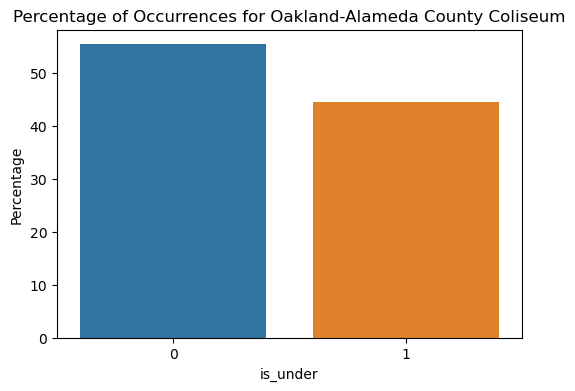

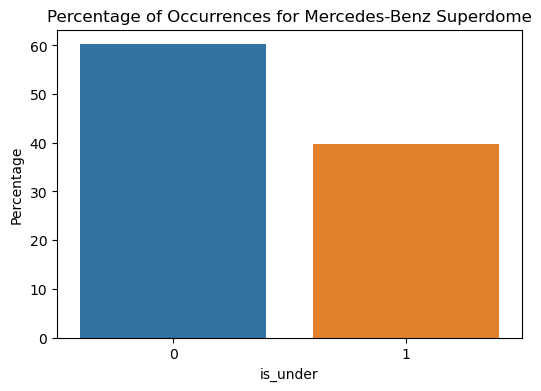

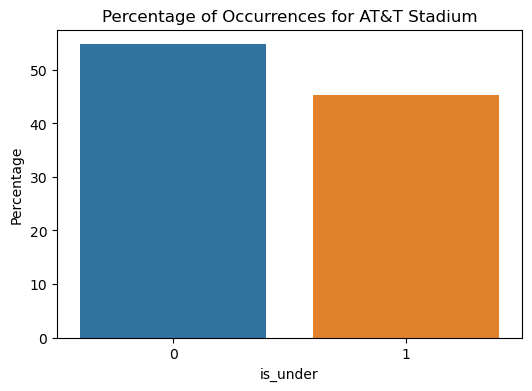

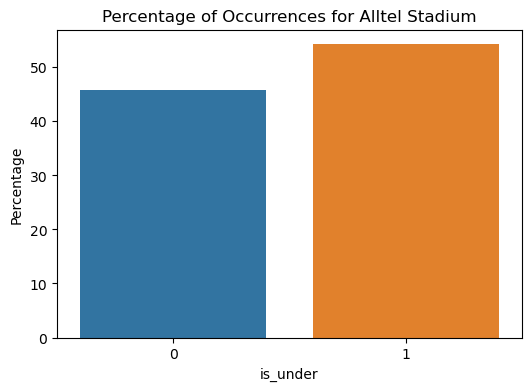

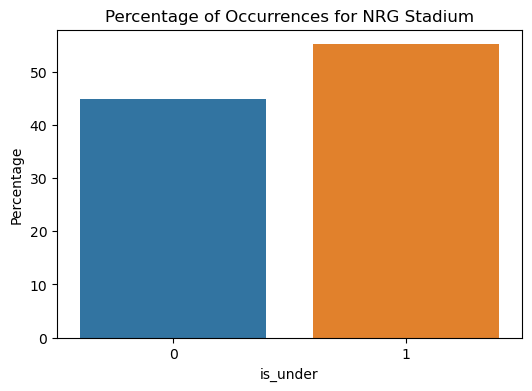

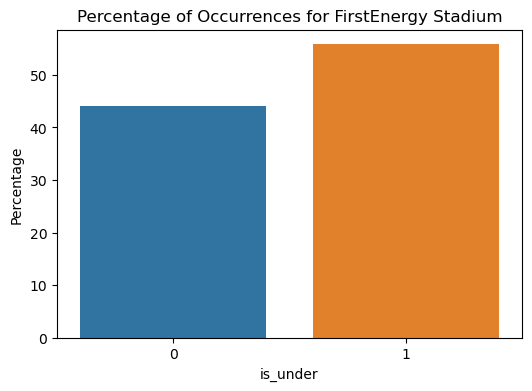

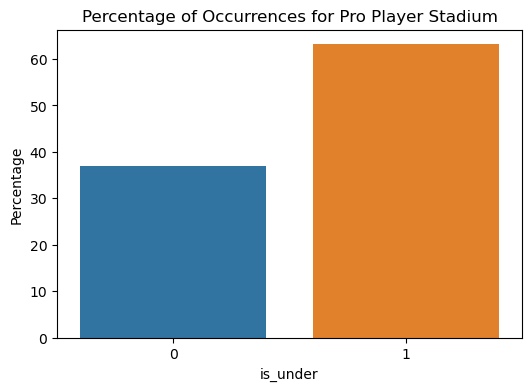

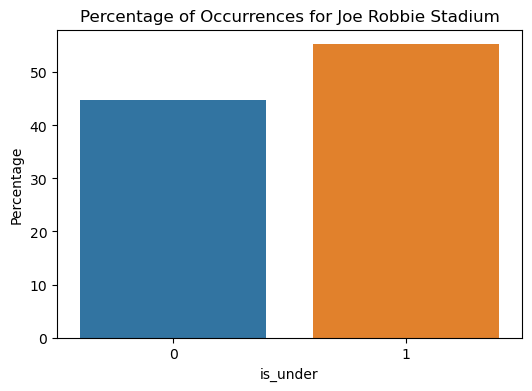

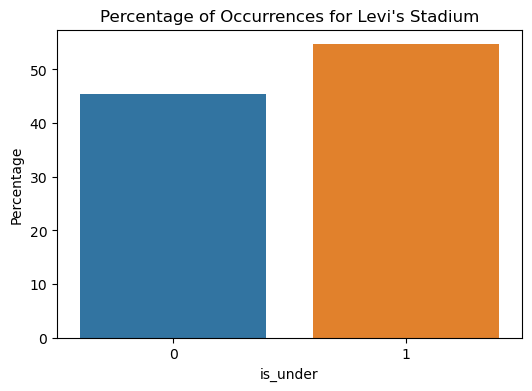

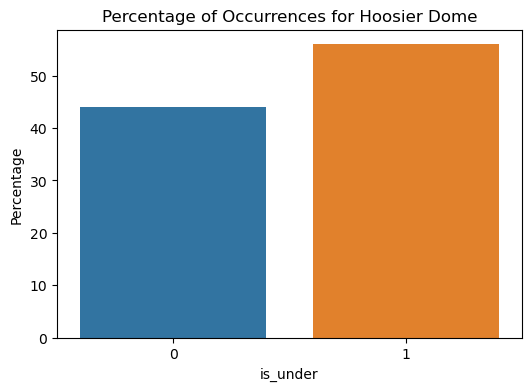

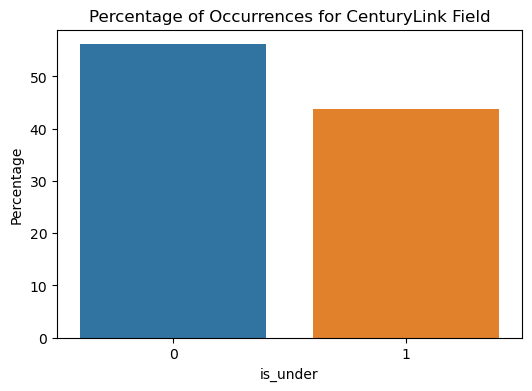

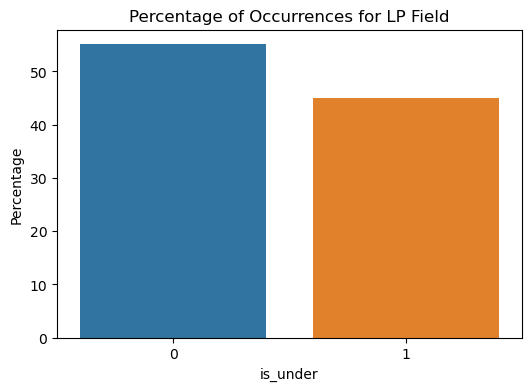

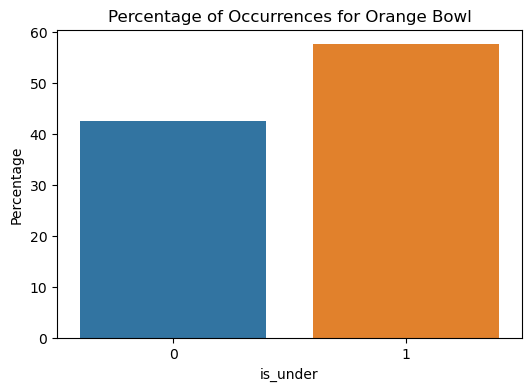

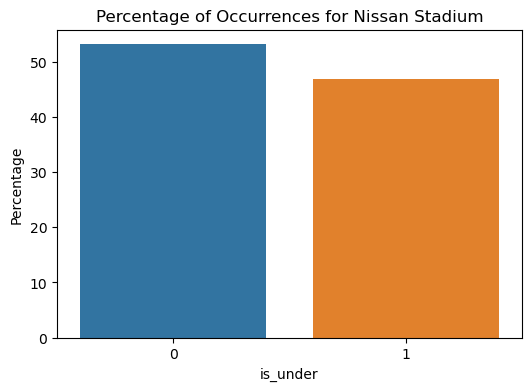

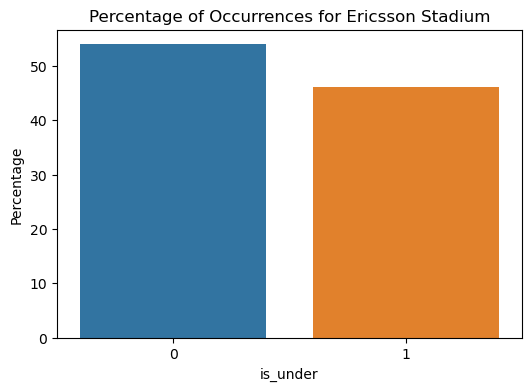

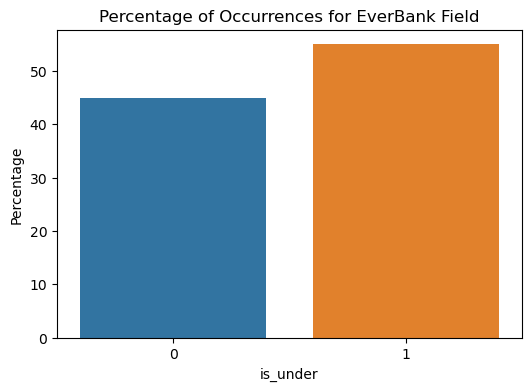

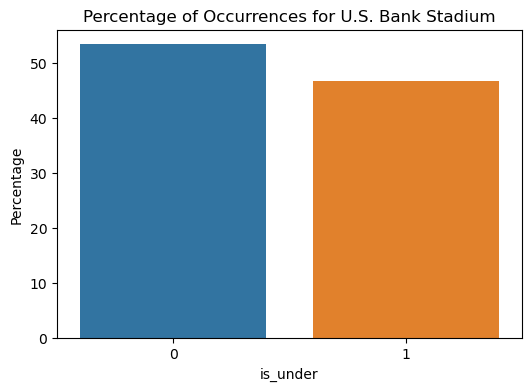

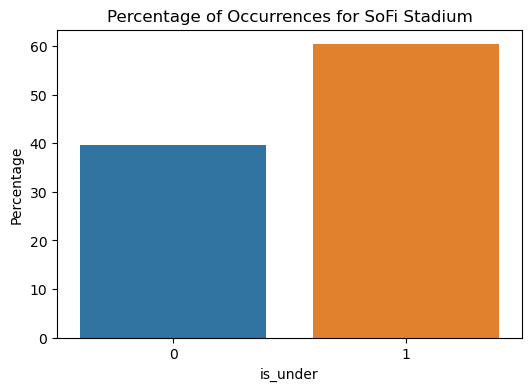

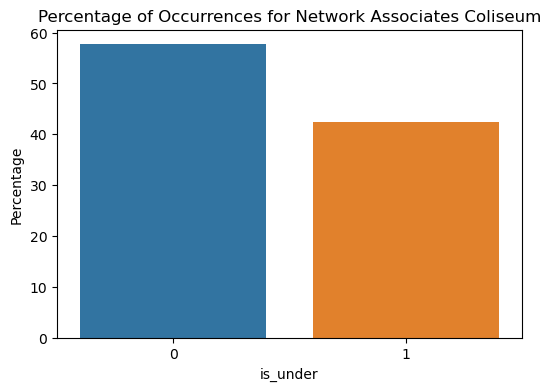

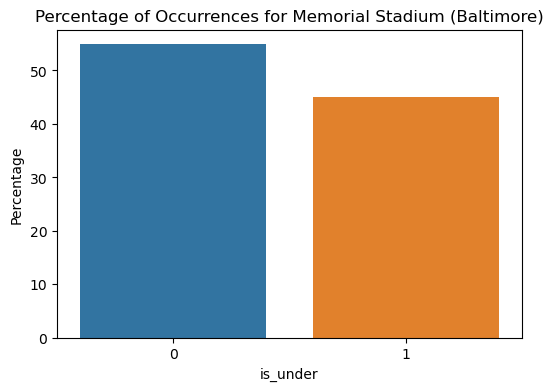

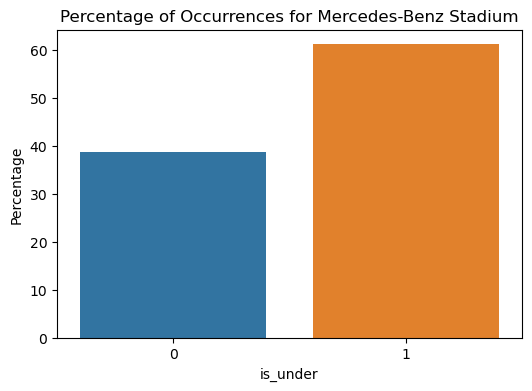

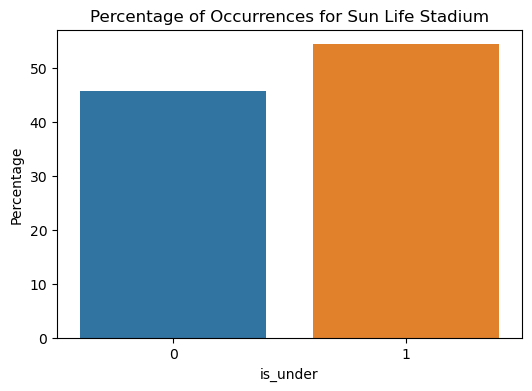

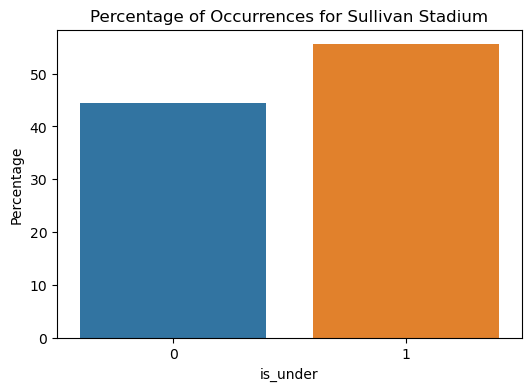

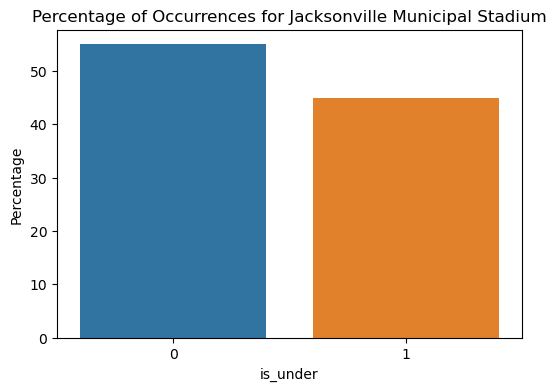

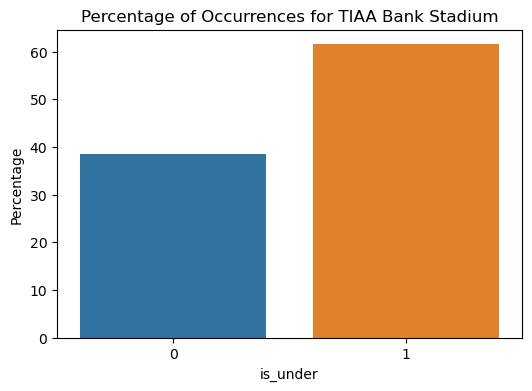

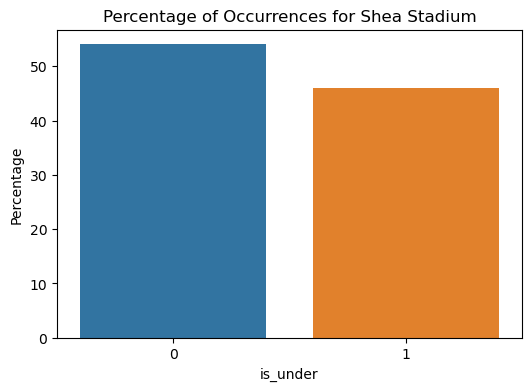

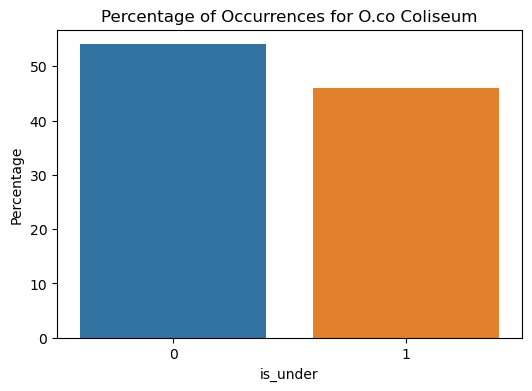

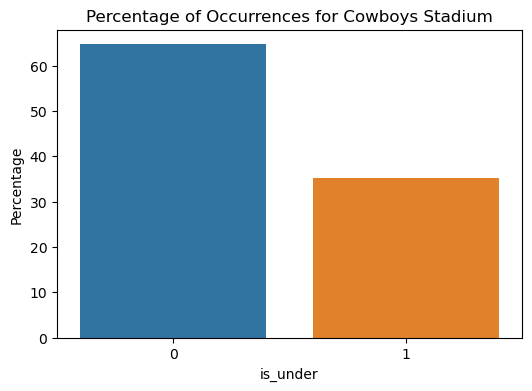

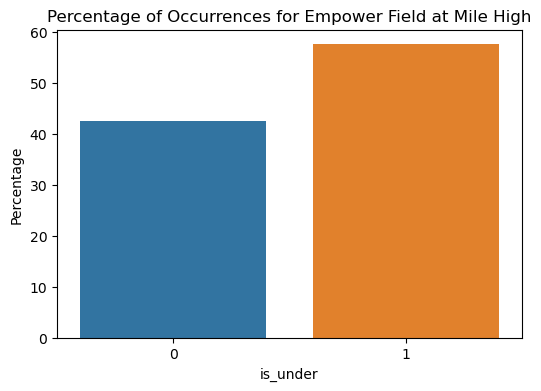

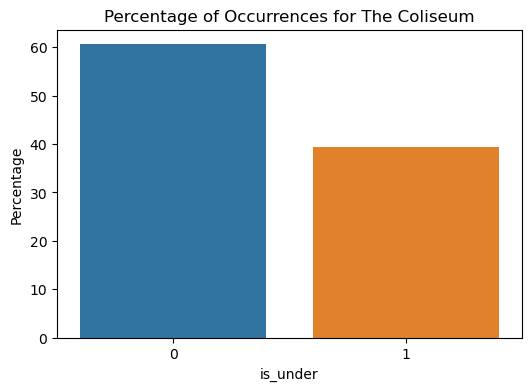

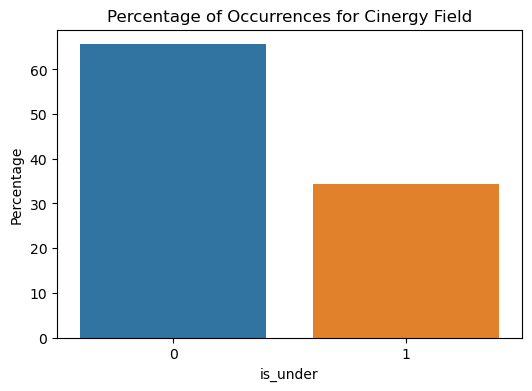

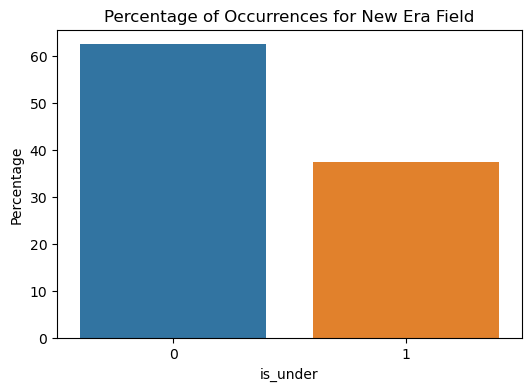

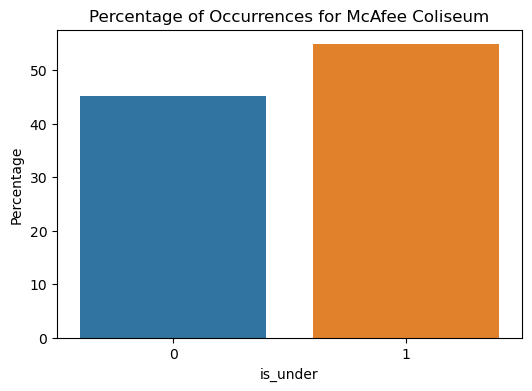

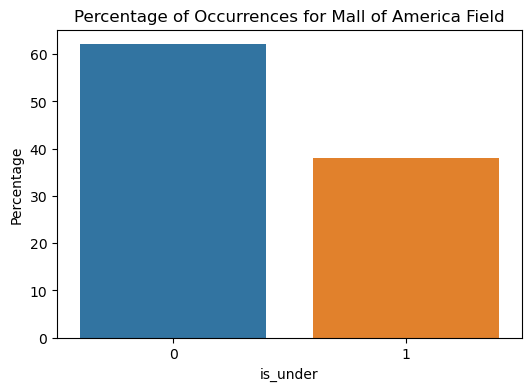

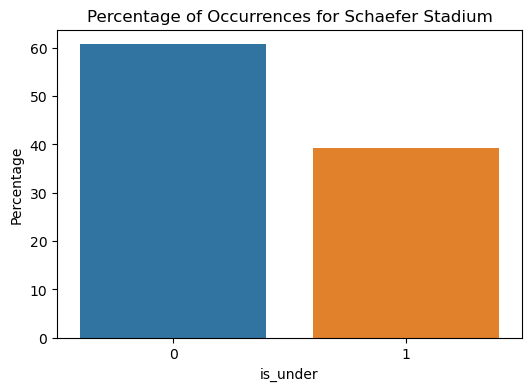

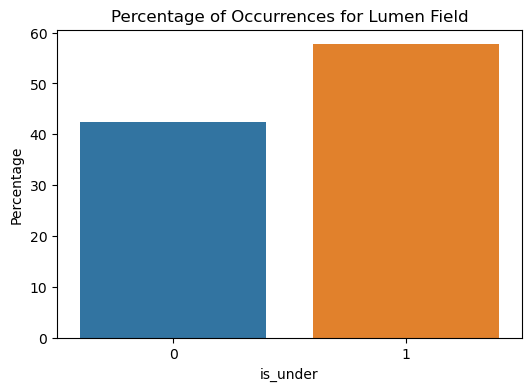

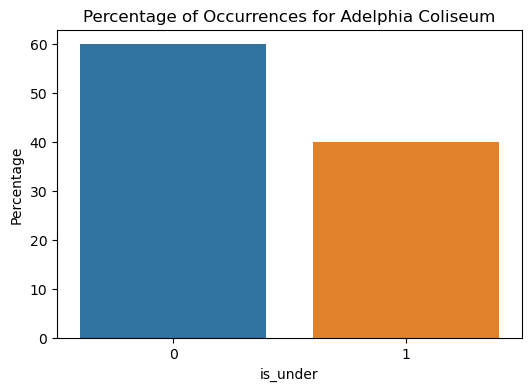

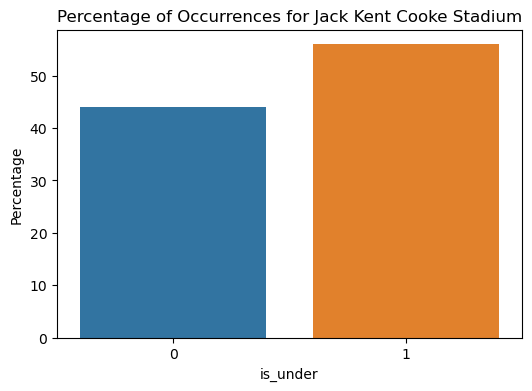

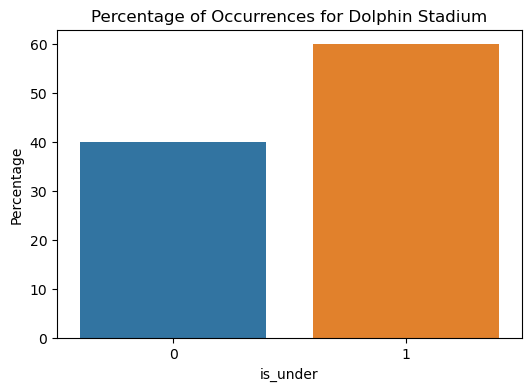

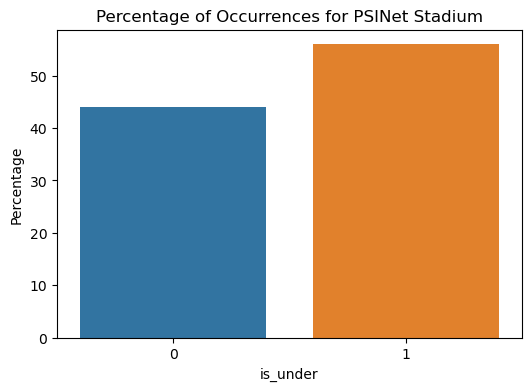

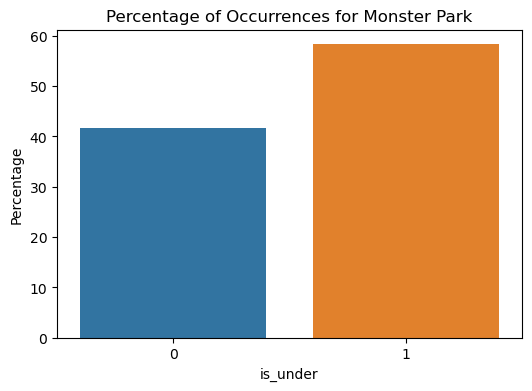

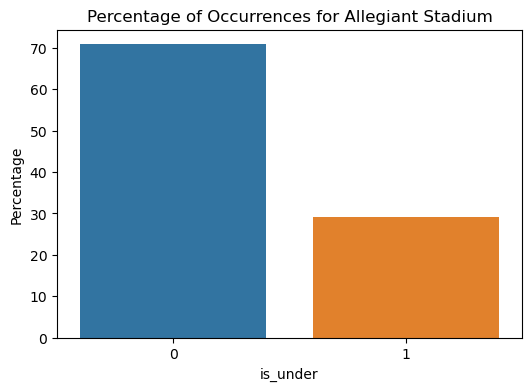

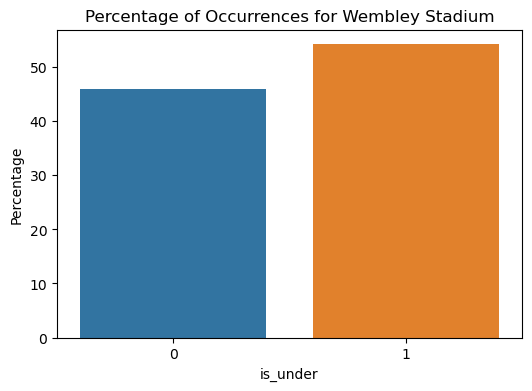

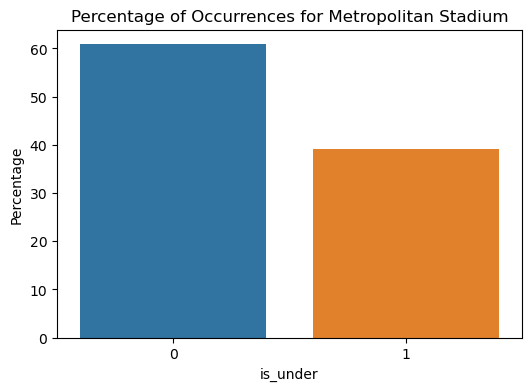

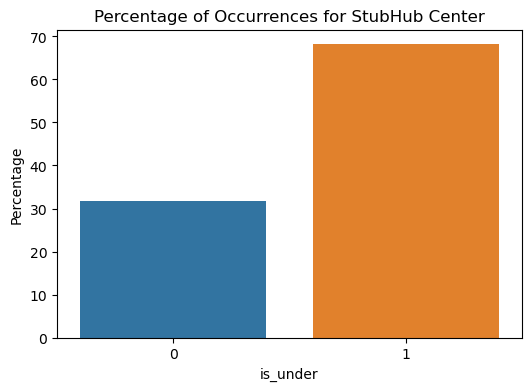

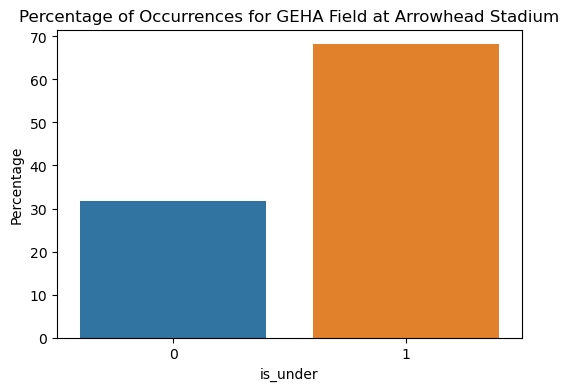

In [33]:
filtered_stadiums = df['stadium'].value_counts().loc[lambda x: x >= 20].index

# Create a separate plot for each stadium where '0' or '1' has a percentage above 53%
for stadium in filtered_stadiums:
    stadium_df = df[df['stadium'] == stadium]
    total_occurrences = len(stadium_df)
    percentage_df = stadium_df['is_under'].value_counts() / total_occurrences * 100

    if percentage_df[0] > 53 or percentage_df[1] > 53:
        plt.figure(figsize=(6, 4))
        sns.barplot(data=percentage_df.reset_index(), x='index', y='is_under')
        plt.xlabel('is_under')
        plt.ylabel('Percentage')
        plt.title(f'Percentage of Occurrences for {stadium}')
        plt.show()
    

In [35]:
# iltered_stadiums = df['stadium'].value_counts().loc[lambda x: x >= 100].index

# # Create a separate table for each stadium and check the percentage of occurrences for 'is_under' values
# for stadium in filtered_stadiums:
#     stadium_df = df[df['stadium'] == stadium]
#     total_occurrences = len(stadium_df)
#     percentage_df = stadium_df['is_under'].value_counts() / total_occurrences * 100

#     # Check if either '0' or '1' has a percentage above 53%
#     if percentage_df[0] > 53 or percentage_df[1] > 53:
#         print(f"Stadium: {stadium}")
#         print(percentage_df)
#         print("---------------------------")

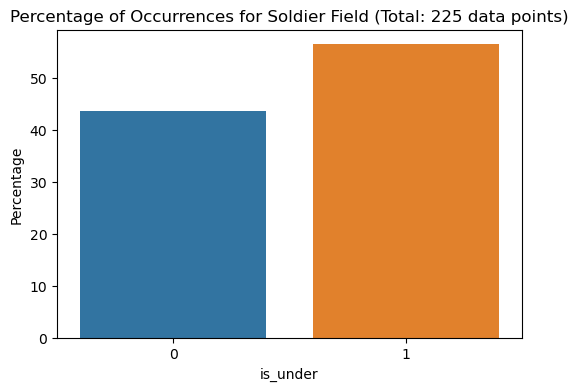

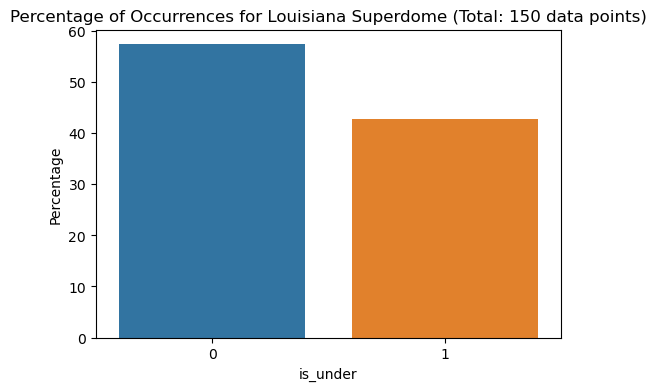

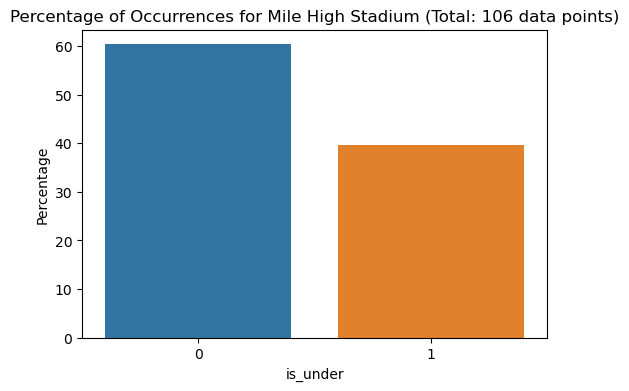

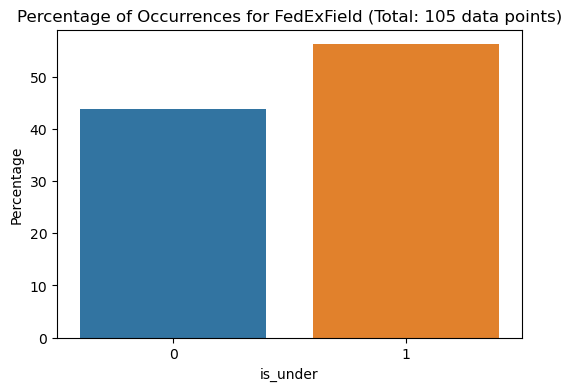

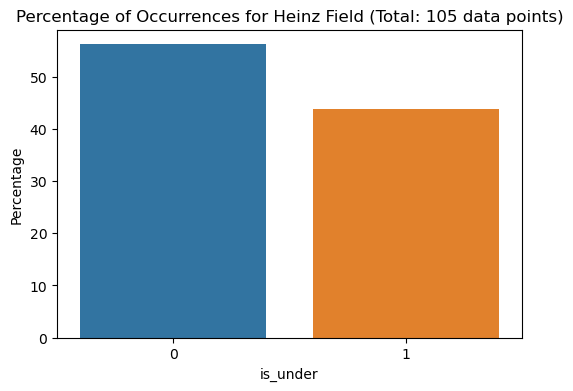

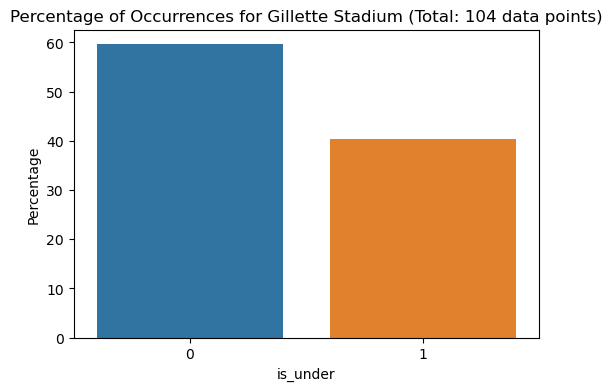

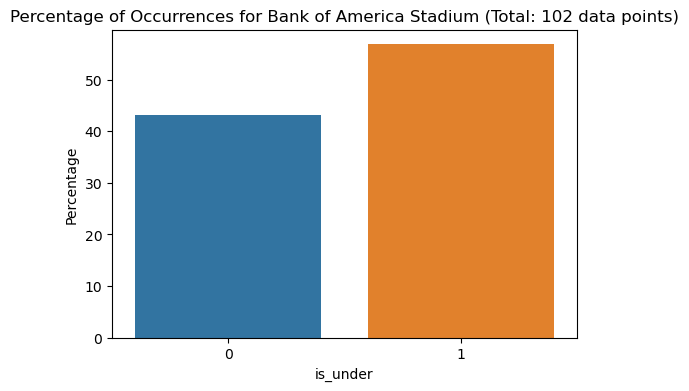

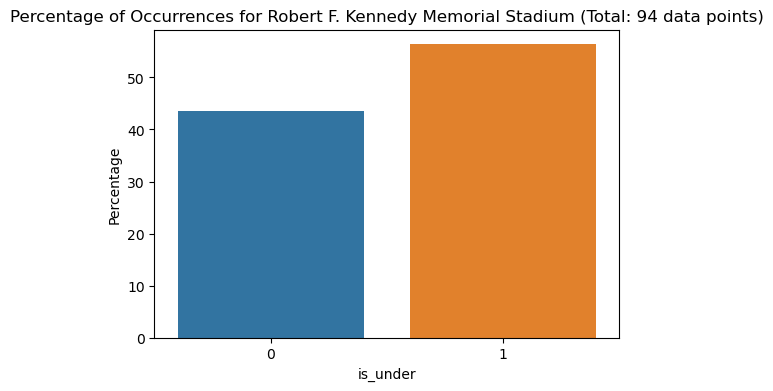

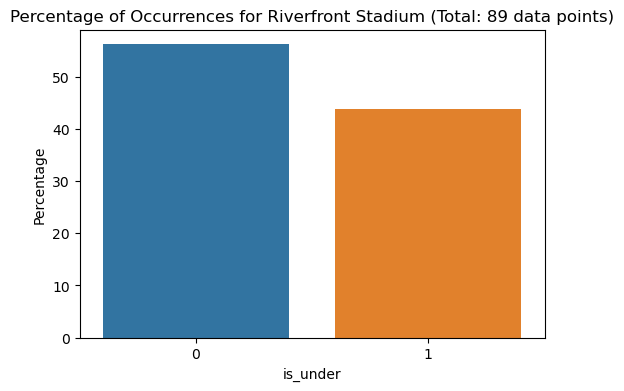

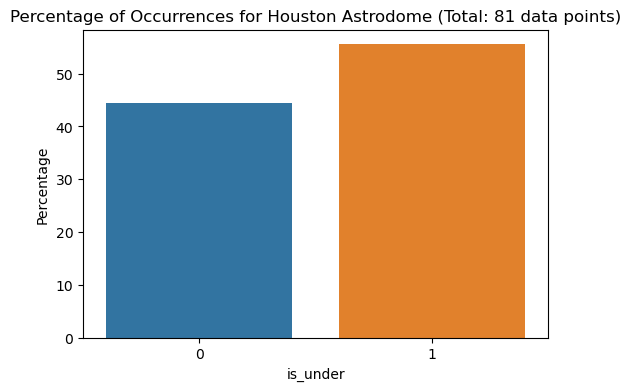

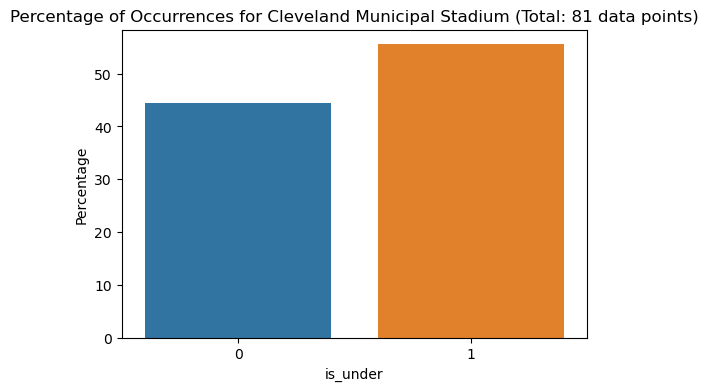

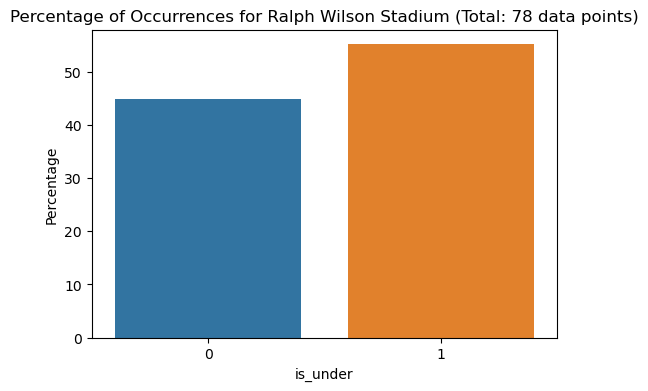

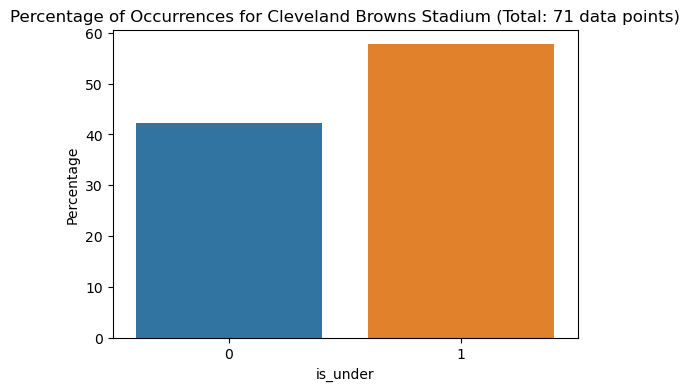

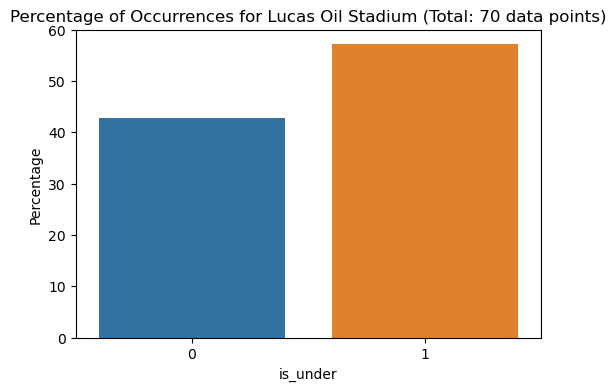

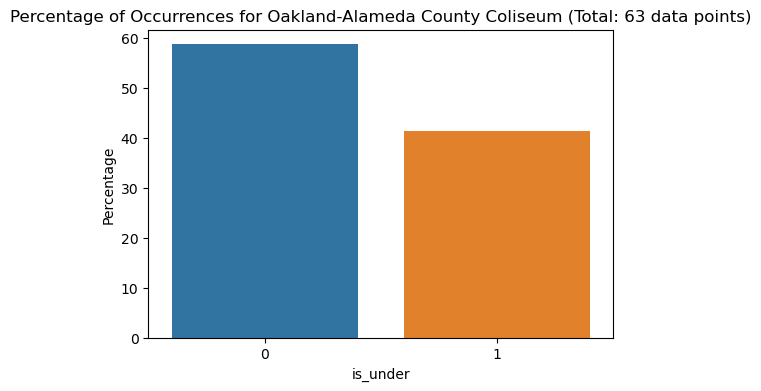

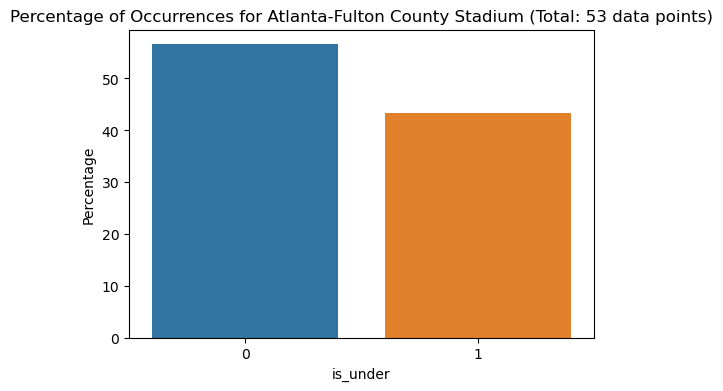

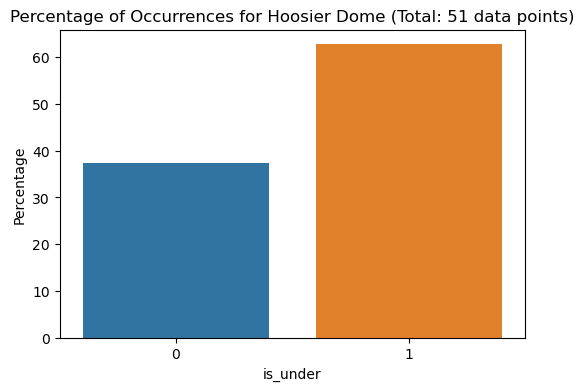

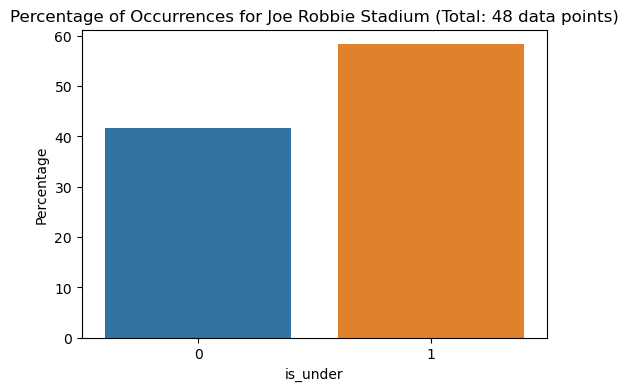

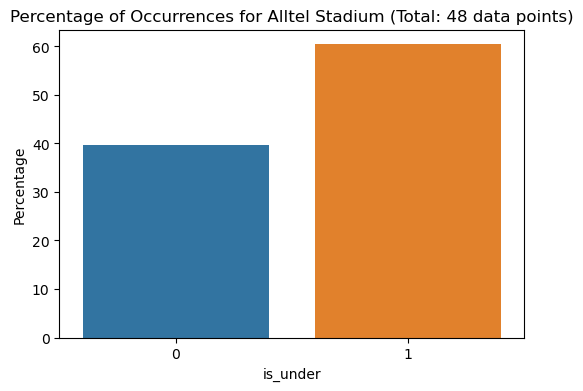

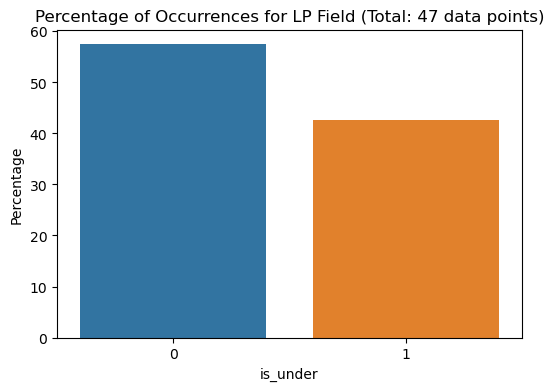

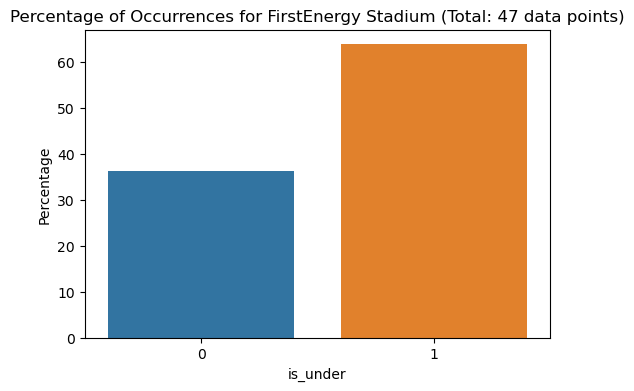

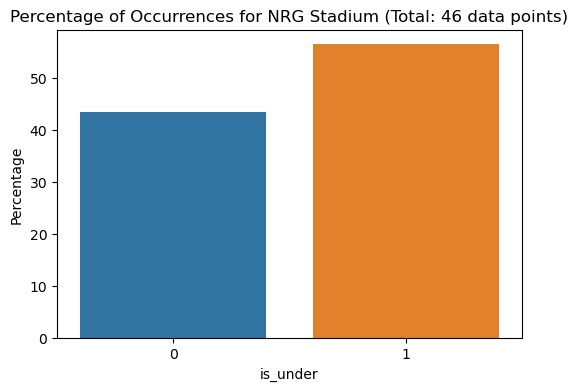

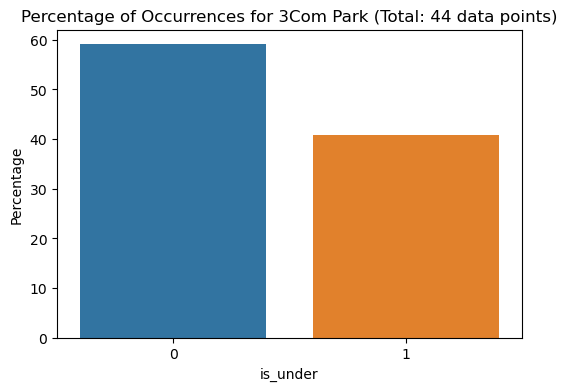

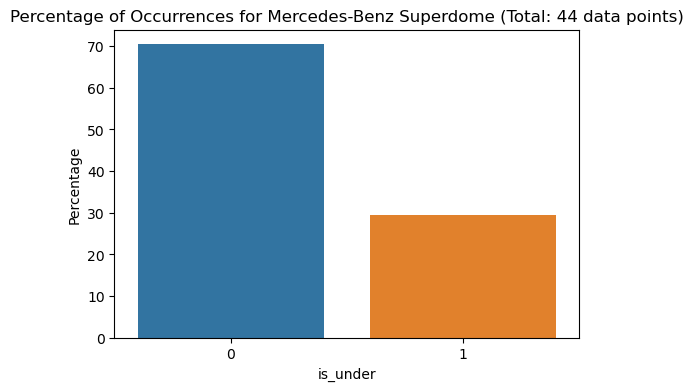

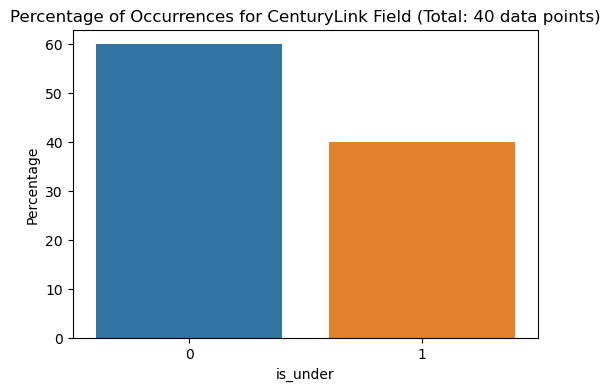

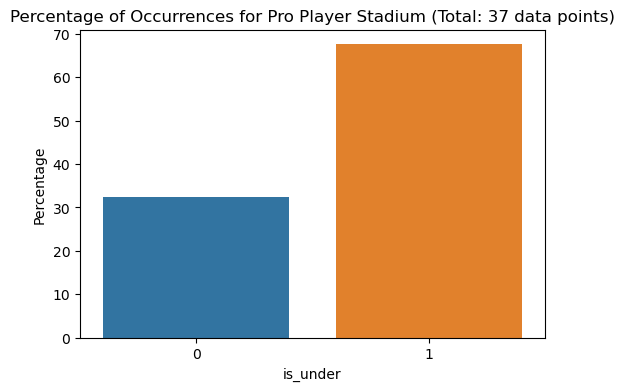

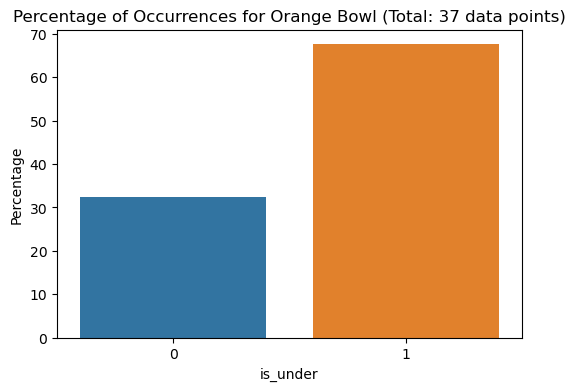

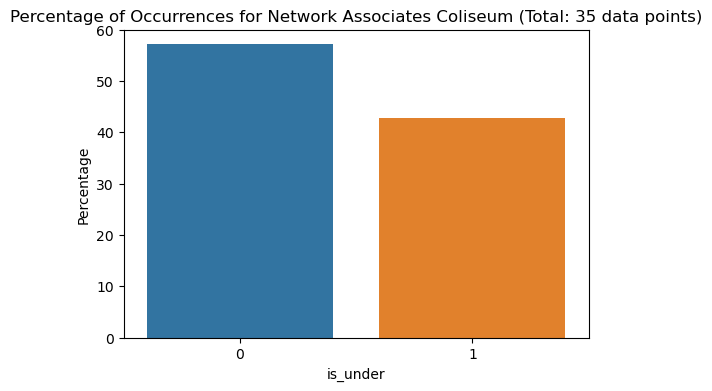

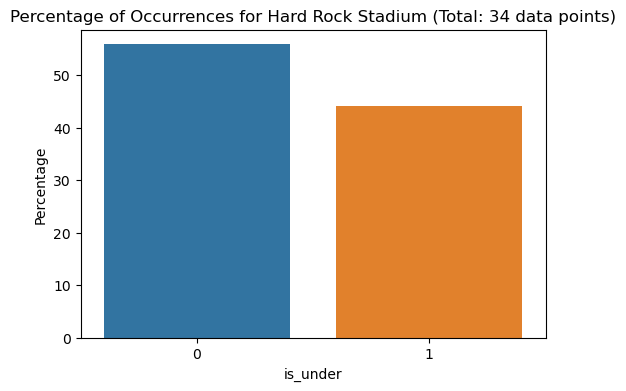

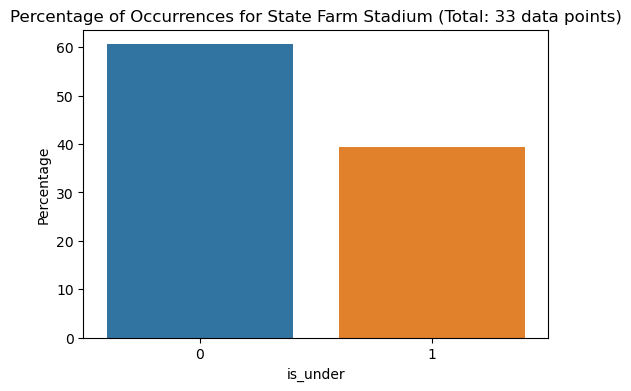

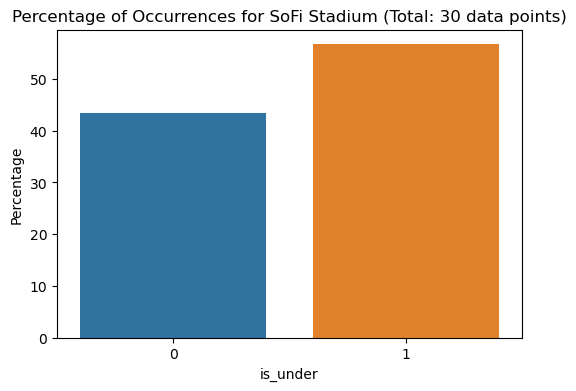

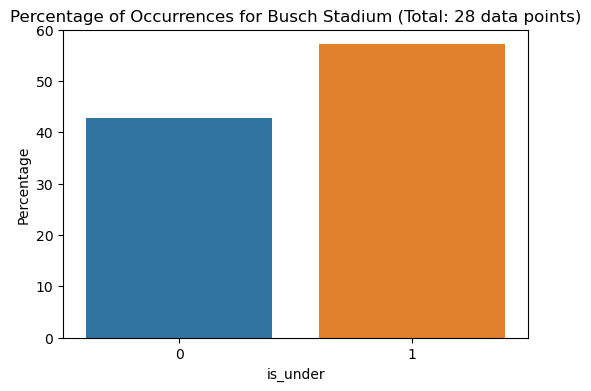

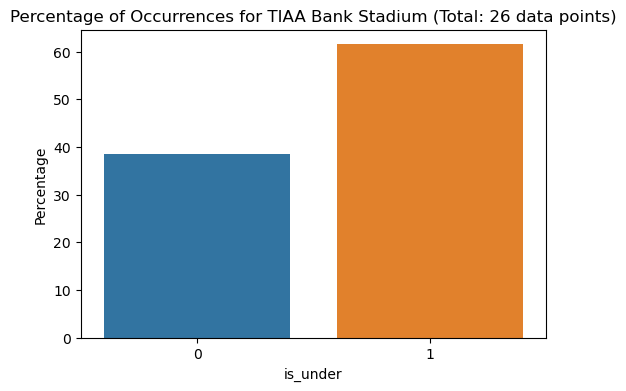

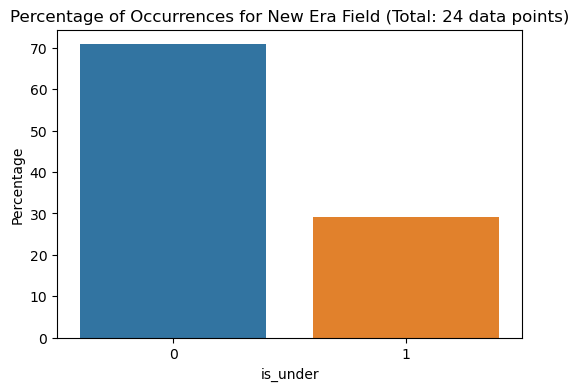

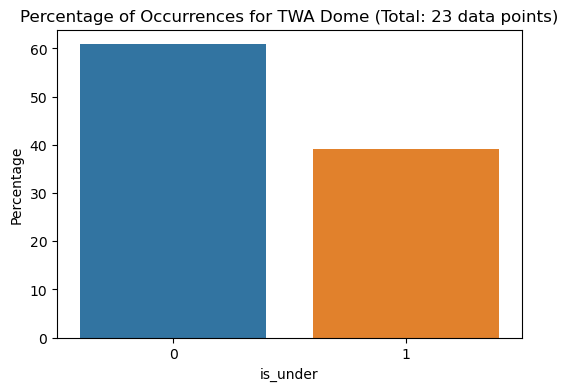

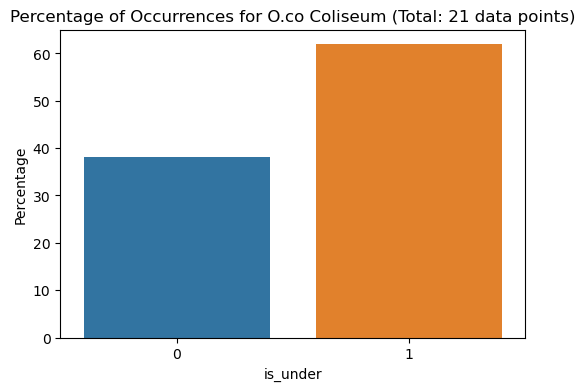

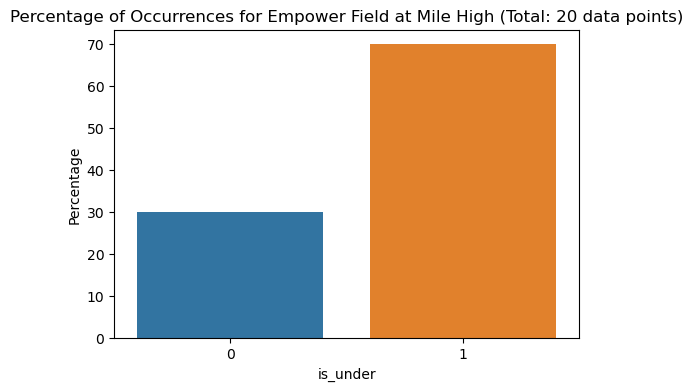

In [68]:
filtered_stadiums = train['stadium'].value_counts().loc[lambda x: x >= 20].index

# Create a separate plot for each stadium where '0' or '1' has a percentage above 53%
for stadium in filtered_stadiums:
    stadium_df = train[train['stadium'] == stadium]
    total_occurrences = len(stadium_df)
    percentage_df = stadium_df['is_under'].value_counts() / total_occurrences * 100

    if percentage_df[0] > 55 or percentage_df[1] > 55:
        plt.figure(figsize=(6, 4))
        sns.barplot(data=percentage_df.reset_index(), x='index', y='is_under')
        plt.xlabel('is_under')
        plt.ylabel('Percentage')
        plt.title(f'Percentage of Occurrences for {stadium} (Total: {total_occurrences} data points)')
        plt.show()

<div style='background-color : lightblue'>
<a id='q8'></a>
    <b><u><i><h1 style='text-align : center; padding-top: 25px;''>
        Stats Test!
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

<b>Question 8.</b> 

- ${H_0}$: No statistically significant difference exists between MEAN is_UNDER of ALL games and that of games in Lucas Oil field.
- ${H_a}$: A statistically significant difference does not exist between MEAN is_UNDER of ALL games and that of games in Lucas Oil field.

In [41]:
train_lucas = train[train.stadium == 'Lucas Oil Stadium']

In [66]:
observed = pd.crosstab(train2['stadium_FedExField'], train2.is_under)
observed

is_under,0,1
stadium_FedExField,,
0,3142,3224
1,46,59


In [69]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p,expected,degf

(0.3034141365789433,
 array([[3136.27074641, 3229.72925359],
        [  51.72925359,   53.27074641]]),
 1)

In [52]:
train2 = train.copy()

In [55]:
train2 = pd.get_dummies(data=train2, columns=['stadium'])

In [57]:
train2.shape

(6471, 148)

In [59]:
train2.columns.to_list()

['date',
 'day_of_week',
 'start_time',
 'week_num',
 'home_score',
 'home_wins',
 'away_score',
 'away_wins',
 'temp',
 'humidity',
 'wind',
 'spread',
 'ou',
 'is_under',
 'abnormal_start',
 'total_scores',
 'is_playoff',
 'playoff_implications',
 'is_turf',
 'is_outdoor',
 'stadium_3Com Park',
 'stadium_AT&T Stadium',
 'stadium_Acrisure Stadium',
 'stadium_Adelphia Coliseum',
 'stadium_Alamo Dome',
 'stadium_Allegiant Stadium',
 'stadium_Alltel Stadium',
 'stadium_Anaheim Stadium',
 'stadium_Arrowhead Stadium',
 'stadium_Atlanta-Fulton County Stadium',
 'stadium_Azteca Stadium',
 'stadium_Bank of America Stadium',
 'stadium_Bills Stadium',
 'stadium_Busch Stadium',
 'stadium_Caesars Superdome',
 'stadium_Candlestick Park',
 'stadium_CenturyLink Field',
 'stadium_Cinergy Field',
 'stadium_Civic Center Busch Memorial Stadium',
 'stadium_Cleveland Browns Stadium',
 'stadium_Cleveland Municipal Stadium',
 'stadium_Cowboys Stadium',
 'stadium_Dolphin Stadium',
 'stadium_Dolphins Stadium'

<div style='background-color : lightblue'>
<a id='q9'></a>
    <b><u><i><h1 style='text-align : center; padding-top: 25px;''>
        Question 9
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

<b>Question 9.</b>  



<div style='background-color : lightblue'>
<a id='bonus'></a>
    <b><u><i><h1 style='text-align : center; padding-top: 25px;''>
        Bonus
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>